<a href="https://colab.research.google.com/github/SauravMaheshkar/guides/blob/main/projects/machine_learning/Decision%20Trees/Decision%20Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction






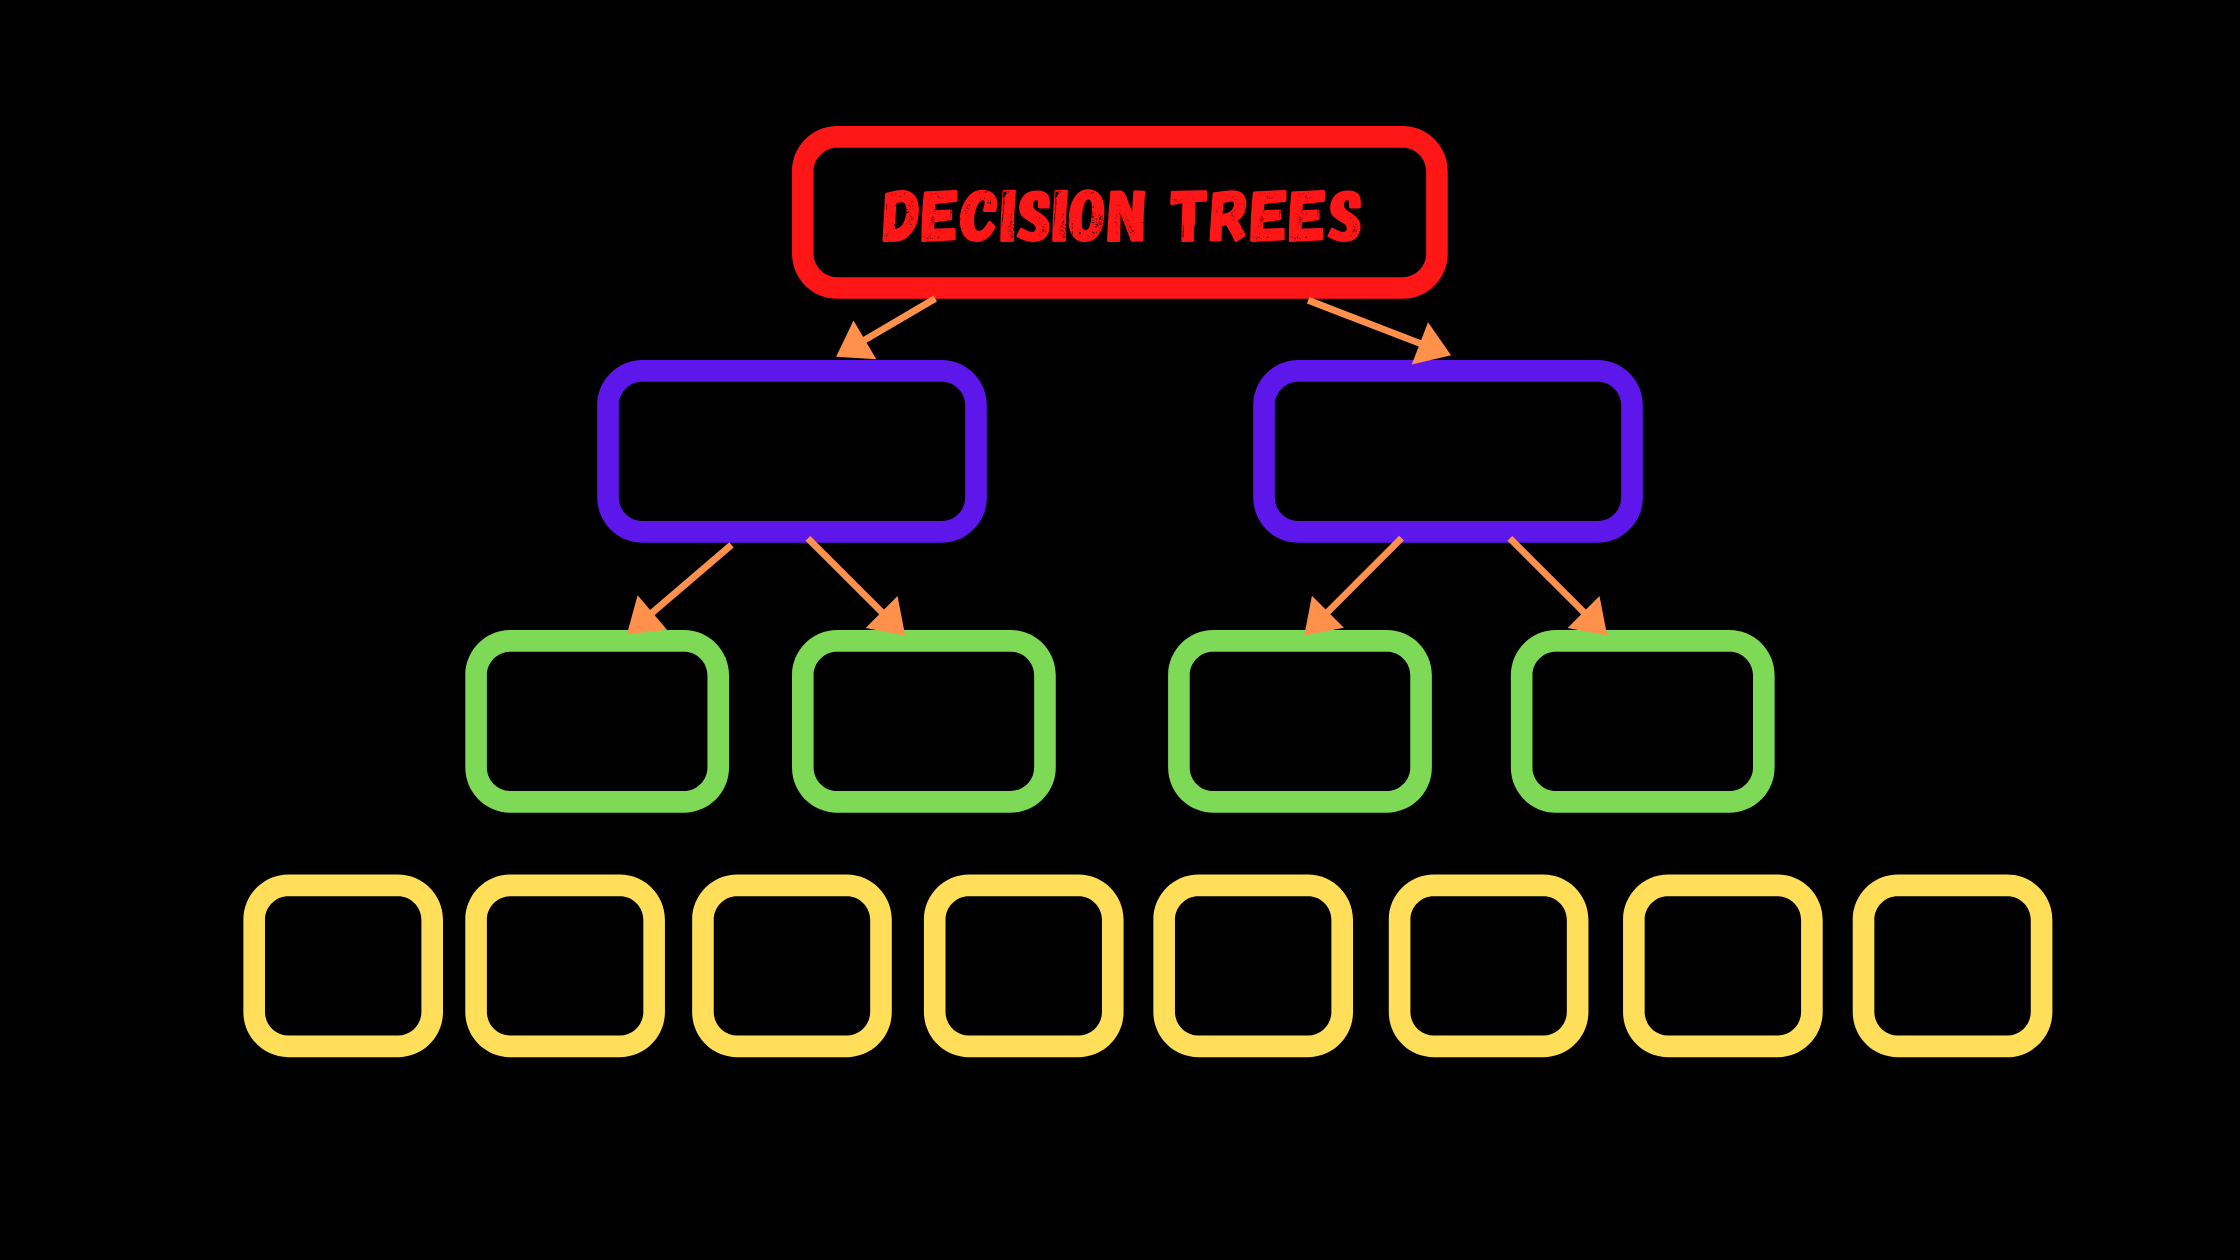


A *decision tree* is a hierarchical data structure implementing the divide-and-conquer stratergy. It is an efficient nonparametric method, which can be used for both classification and regression. 

In **parametric estimation**, we define a model over the whole input space and learn its parameters from all of the training data. Then we use the same model and the same parameter set for any test input. In **nonparametric estimation**, we divide the input space into local regions, defined be distance measures.

A decision tree is a non-parametric model in the sense that we do not assume any parametric form for the class densities and the *tree structure is not fixed* a priori but the tree grows, branches and leaves are added, during learning depending on the complexity of the problem inherent in the data.



> A **tree** is a set of one or more nodes. A node $x_i$, subscript $i$ being either empty or a sequence of one or more non-negative integers, is joined to another node $x_{ij}$ by an arc directed from $x_i$ to $x_{ij}$.



# Theory


## Terminology





1. **Root Node:** Represents the entire population or sample and this further gets divided into two or more homogeneous sets.
2. **Leaf Node:** That node which can't get segregated into further nodes
3. **Splitting:** Dividing the root node/subtree into different parts on the basis of some condition
4. **Pruning:** Opposite of splitting. Removing unwanted branches from the tree

5. **Branch/Sub-Tree:** A sub-section of decision tree

6. **Parent and Child Node:** A node, which is divided into sub-nodes is called parent node of sub-nodes where sub-nodes are the child of parent node

## Complexity



The run time cost to construct a balanced binary tree is :

* $O(n_{samples}n_{features}log(n_{samples}))$



## Where to Split ?

### Gini Index
---
* Gini Index, also known as *Gini impurity*, calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly. If all the elements are linked with a single class then it can be called pure.

* It varies between 0 and 1

* It's calculated by deducting the sum of square of probabilites of each class from one

> $Gini \, Index = 1 - \sum_{i-1}^{n} (P_i)^2$

### Information Gain
---
* Entropy is the measurement of the impurity or randomness in data points

* Entropy is calculated between 0 and 1

* Information Gain is applied to quantify which feature provides maximal information about the classification based on the notion of entropy, i.e. by quantifying the size of uncertainty, disorder or impurity, in general, with the intention of decreasing the amount of entropy initiating from the top (root node) to bottom(leaves nodes)

> $Entropy = -\sum_{i=1}^{n}p_i * log_2(p_i)$

### Reduction in Variance
---

* Reduction in variance is an algorithm used for continuous target variables.

* This algorithm uses the standard formula of variance to choose the best split. The split with lower variance is selected as the criteria to split the population.

> $ Variance = \frac{\sum (X - \bar{X})^2}{n} $

### Chi-Square

---

* It is an algorithm to find out the statistical significance between the differences between sub nodes and parent node.

* We measure it by sum of squares of standardised differences between observed and expected frequencies of target variable.

## Algorithms used in Decision Trees

### ID3
---
The core algorithm for building decision trees is called ID3. Developed by J. R. Quinlan, this algorithm employs a top-down, greedy search through the space of possible branches with no backtracking. ID3 uses Entropy and Information Gain to construct a decision tree.

### C4.5 
---
C4.5 builds decision trees from a set of training data in the same way as ID3, using the concept of information entropy.

C4.5 made a number of improvements to ID3. Some of these are:
Handling both continuous and discrete attributes — In order to handle continuous attributes, C4.5 creates a threshold and then splits the list into those whose attribute value is above the threshold and those that are less than or equal to it.

Handling training data with missing attribute values — C4.5 allows attribute values to be marked as ? for missing. Missing attribute values are simply not used in gain and entropy calculations. Handling attributes with differing costs.
Pruning trees after creation — C4.5 goes back through the tree once it’s been created and attempts to remove branches that do not help by replacing them with leaf nodes.

### CART
---
Classification and Regression Trees or CART for short is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification or regression predictive modeling problems.

Classically, this algorithm is referred to as “decision trees”, but on some platforms like R they are referred to by the more modern term CART.

The CART algorithm provides a foundation for important algorithms like bagged decision trees, random forest and boosted decision trees.

# The Iris Dataset



We use perhaps the best known dataset in pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a *type of iris plant*. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

**Attributes**

1. Sepal length (*in cm*)
2. Sepal width (*in cm*)
3. Petal length (*in cm*)
4. Petal width (*in cm*)
5. Class:
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica


## Visualization

### Distribution of Length and Width

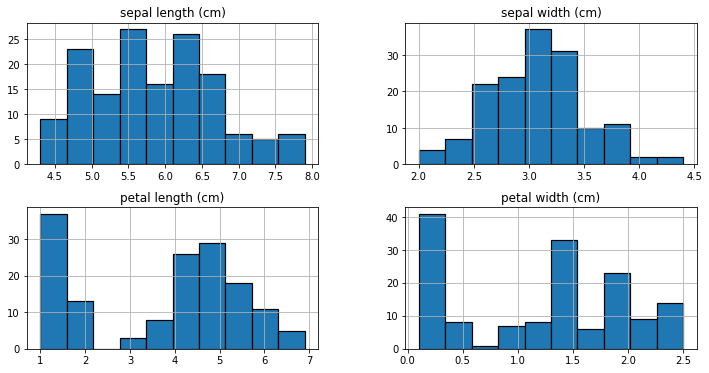

In [ ]:
## Importing Libraries
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Dataset
iris = load_iris(return_X_y = True, as_frame= True)
dataset = iris[0]
target = iris[1]

## Plotting Histogram
dataset.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

# Building the Classification model

We use the [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn-tree-decisiontreeclassifier) method from the sklearn library.

## Parameters
---

* **criterion:** "`gini`" or "`entropy`"
* **splitter:** "`best`" or "`random`"
* **max_depth (*int*):** The maximum depth of the tree. Defaults to `None`, then nodes are expanded until all leaves are pure
* **min_samples_split (*int*):** The minimum number of samples required to split an internal node.

You can find the other parameters [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn-tree-decisiontreeclassifier).

In [34]:
#@title Classification Tree

max_depth =  5#@param {type: "number"}
min_samples_split = 2  #@param {type: "number"}
criterion = "gini"  #@param ['gini', 'entropy']
splitter = "best" #@param ["best", "random"] {allow-input: true}
#@markdown ---

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
clf = DecisionTreeClassifier(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    criterion=criterion,
    splitter=splitter
)
clf = clf.fit(X,y)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig = plt.figure(figsize=(10,5))
_ = tree.plot_tree(clf, 
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)

# Analysing Parameter Effects

## **Gini** vs **Entropy** for Splitting

As, we can see if we keep the `max_depth` as constant the structure of the trees remains same. Irrespective of the splitting criterion

### Max Depth = 3
------

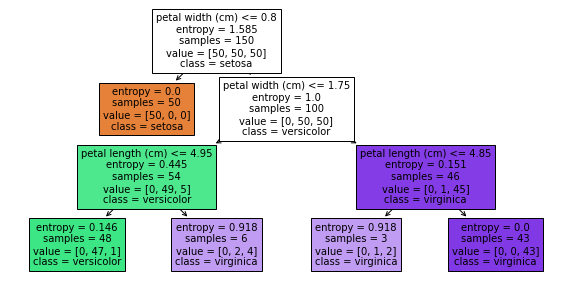

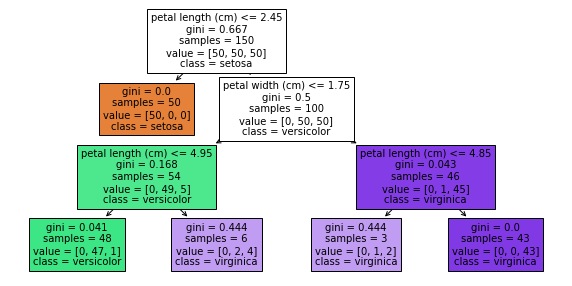

### Max Depth = 4
------------

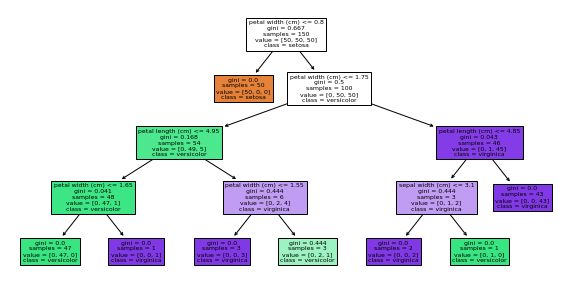

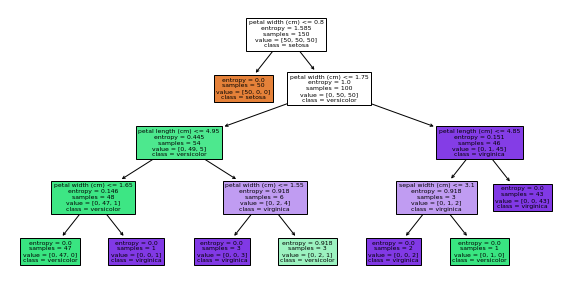

## Different Depths

### Max Depth = 2
----

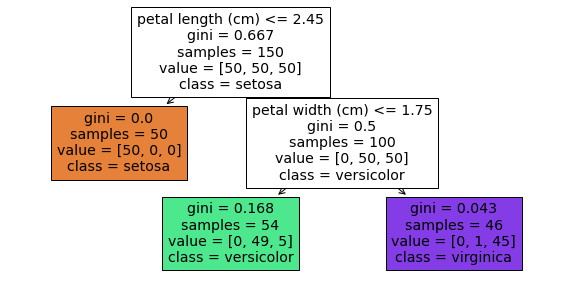

### Max Depth = 3
----

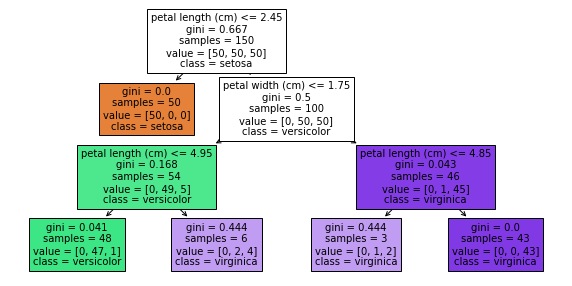

### Max Depth = 4
----

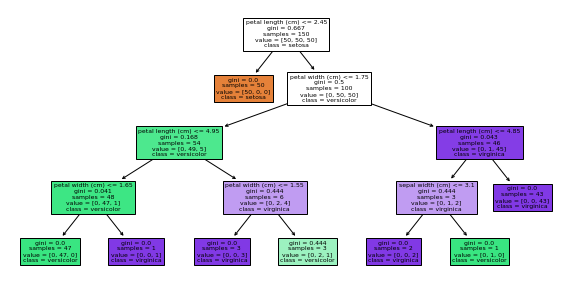

### Max Depth = 4
----

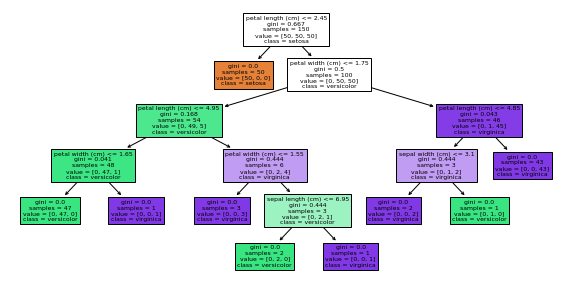

# Building the Regression Model

We use the [`sklearn.tree.DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontreeregressor#sklearn.tree.DecisionTreeRegressor) method from the sklearn library.

## Parameters
---

* **criterion:** "`gini`" or "`entropy`"
* **splitter:** "`best`" or "`random`"
* **max_depth (*int*):** The maximum depth of the tree. Defaults to `None`, then nodes are expanded until all leaves are pure
* **min_samples_split (*int*):** The minimum number of samples required to split an internal node.


You can find the other parameters [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontreeregressor#sklearn.tree.DecisionTreeRegressor).

In [ ]:
#@title Regression Tree

max_depth =  5#@param {type: "number"}
min_samples_split = 2  #@param {type: "number"}
criterion = "mse"  #@param ['mse', 'friedman_mse', 'mae']
splitter = "best" #@param ["best", "random"] {allow-input: true}
#@markdown ---

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor

X, y = load_iris(return_X_y=True)
reg = DecisionTreeRegressor(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    criterion=criterion,
    splitter=splitter
)
reg = reg.fit(X,y)

# Visualising the Regression Model

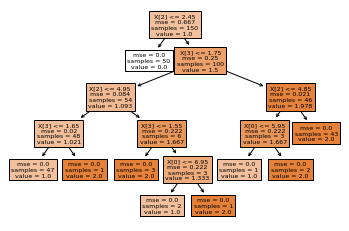

In [38]:
from sklearn import tree

%matplotlib inline
tree.plot_tree(reg, filled = True)
plt.show()

We can also export the tree into GraphViz format using [`export_graphviz()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn-tree-export-graphviz).

## Parameters
---

* **out_file:** Handle or name of the output file

* **max_depth:** The maximum depth of the representation. It defaults to `None`, and the tree is fully generated

* **filled:** When set to `True`, it paint nodes to indicate majority class for classification. It defaults to `False`.

You can find the other parameters [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn-tree-export-graphviz).

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(reg, out_file=None, filled=True) 
graph = graphviz.Source(dot_data)
graph.render("Diabetes") 

'iris.pdf'

# Resources

* [Decision Tree. It begins here](https://medium.com/@rishabhjain_22692/decision-trees-it-begins-here-93ff54ef134)

* [Decision tree learning](https://en.wikipedia.org/wiki/Decision_tree_learning)

* [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris)

* L. Breiman, J. Friedman, R. Olshen, and C. Stone. Classification and Regression Trees. Wadsworth, Belmont, CA, 1984.